In [1]:
%pylab inline

from importlib import reload
from smlm_dl import zernike
reload(zernike)

Populating the interactive namespace from numpy and matplotlib


<module 'smlm_dl.zernike' from 'd:\\github\\smlm-dl\\smlm_dl\\zernike.py'>

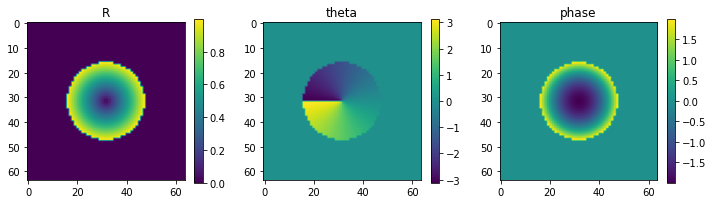

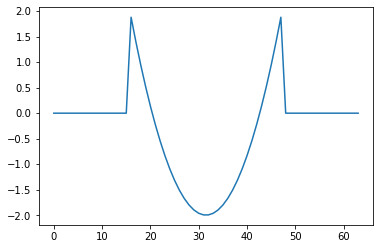

In [2]:
u = np.linspace(-1, 1, 64) / 0.5
U, V = np.meshgrid(u, u, indexing='ij')
R = np.sqrt(U**2 + V**2)
theta = np.arctan2(U, V)

pupil = zernike.calculate_pupil_phase(R, theta, {4:2})

fig, axes = subplots(1, 3, figsize=(12, 3))
im = axes[0].imshow(R*(R<=1))
colorbar(im, ax=axes[0])
axes[0].set_title('R')
im = axes[1].imshow(theta*(R<=1))
colorbar(im, ax=axes[1])
axes[1].set_title('theta')
im = axes[2].imshow(pupil)
colorbar(im, ax=axes[2])
axes[2].set_title('phase')

figure()
plot(pupil[pupil.shape[0]//2])

{0: -0.24993432070840993, 1: -0.07554713507885236, 2: 0.11149422365380057, 3: -0.3295737728543293, 4: -0.7995372785050237, 5: 0.5514854297293694, 6: -0.10741110493888328, 7: 0.7024518421444583, 8: 0.266463152403255, 9: -0.9080549764058474, 10: -0.6871349433372584, 11: -0.21025164670402252, 12: -0.09991072563988457, 13: -0.04733602625255107, 14: 0.25046298369872755, 15: 0.051868763618674096}


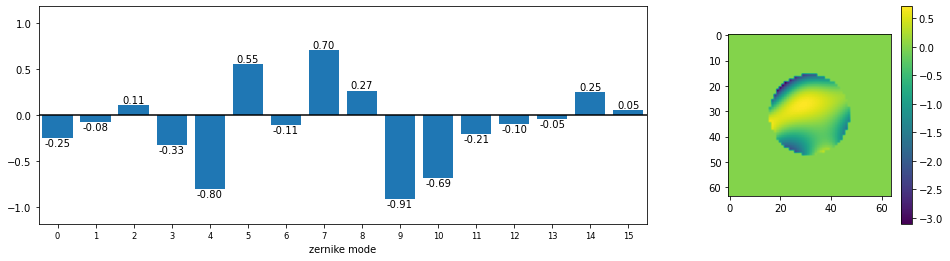

In [3]:
test_zerns = {i: np.random.uniform(-1,1) for i in np.arange(0,16)}
print(test_zerns)
test_pupil = zernike.calculate_pupil_phase(R, theta*(R<=1), test_zerns)

fig, axes = subplots(1, 2, figsize=(16,4), gridspec_kw={'width_ratios': [3, 1]})
zernike.plot_zernike_coeffs(axes[0], test_zerns)
im = axes[1].imshow(test_pupil)
colorbar(im, ax=axes[1])

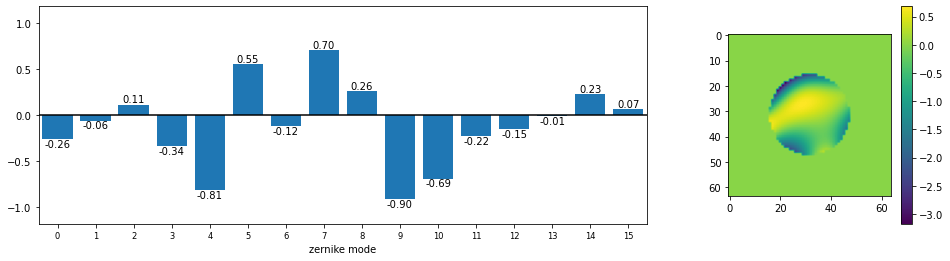

In [4]:
fitted_zerns = zernike.fit_zernike_from_pupil((R<=1)*np.exp(1j*test_pupil), 16, R, theta)

fig, axes = subplots(1, 2, figsize=(16,4), gridspec_kw={'width_ratios': [3, 1]})
zernike.plot_zernike_coeffs(axes[0], fitted_zerns)

im = axes[1].imshow(zernike.calculate_pupil_phase(R, theta*(R<=1), fitted_zerns))
colorbar(im, ax=axes[1])

{0: -0.25043963643198225, 1: -4.090472908232452e-16, 2: -3.933147027146588e-16, 3: -0.33523305766926054, 4: -5.689983997552215e-16, 5: 0.5496135786190322, 6: -0.115804817873679, 7: 0.7030932358437124, 8: 0.25870281883659824, 9: -0.9058221888573644, 10: -0.6871349433372582, 11: -0.22477350729173837, 12: -0.11020509261481003, 13: -0.011992499418886738, 14: 0.24394482457065128, 15: 0.06836666146199875}


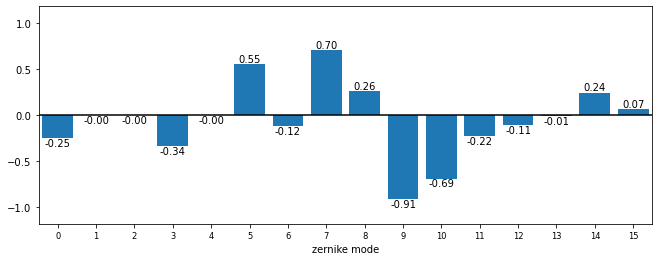

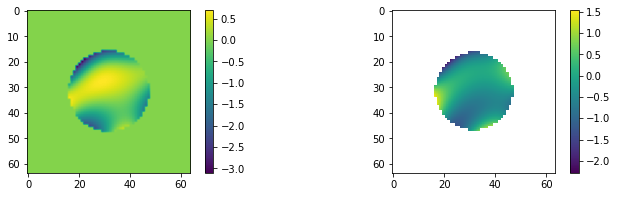

In [5]:
a = zernike.PupilPhase(U, V)

corrected_pupil = test_pupil - a.remove_tilt_tip_defocus(test_pupil)
corrected_zerns = zernike.fit_zernike_from_pupil((R<=1)*np.exp(1j*corrected_pupil), 16, R, theta)
print(corrected_zerns)

fig, ax = subplots(1, 1, figsize=(11,4), )
zernike.plot_zernike_coeffs(ax, corrected_zerns)

fig, axes = subplots(1, 2, figsize=(12, 3))
im = axes[0].imshow(test_pupil)
colorbar(im, ax=axes[0])
im = axes[1].imshow(corrected_pupil)
colorbar(im, ax=axes[1])